# NOTEBOOK_NAME004：支持向量机(分类问题公式及python实现)

此notebook包括：

**1、支持向量机介绍** 

**2、什么是线性可分类支持向量机**

**3、什么是线性分类支持向量机**

**4、硬间隔化和软间隔化**

**5、什么是线性分类支持向量机的对偶形式**

**6、非线性支持向量机与核函数**

**7、利用SVM的人脸识别项目**

包涵的代码知识点有：**分割数据集，PCA降维、网格搜索与交叉验证、混淆矩阵、评估报告模块**等

此篇以**从简入繁**的形式，结合数学公式与python代码、图片生动的解释了什么是支持向量机。与支持向量机的复杂形式。

学习笔记：Python科学手册、统计学习方法

橙子 2018/11/24

------------------------------------------------------------------------

##  1.支持向量机（SVM）简介

SVM是一种二分类模型。他的基本模型是**定义在特征空间上的间隔最大的线性分类器**，间隔最大使他有别于感知机。

SVM还包括**核技巧**，使它成为实质上的**非线性分类器**。

SVM的学习策略就是**间隔最大化**，可形式化为一个**求解凸二次规划**，可等价于**正则化的合页函数最小化问题**

## 2.**线性可分类支持向量机**

通过间隔最大化求解分离超平面：${w}^**x+{b}^*=0$

SVM分类决策函数：$f(x) = sign({w}^**x+{b}^*)$

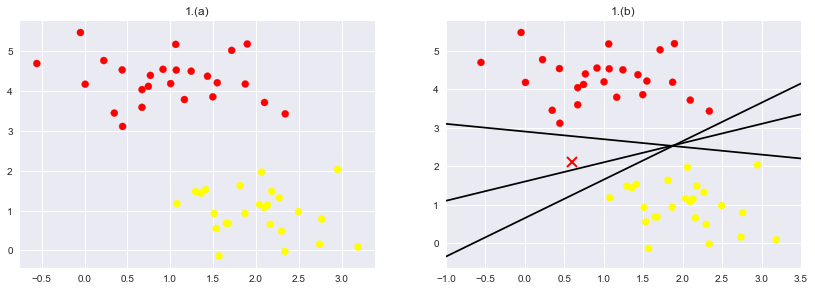

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # 设置图样为seaborn风格
import numpy as np
# 生成简易分类数据，X：sample ， y：target
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.title('1.(a)')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# 生成3种可能形式
xfit = np.linspace(-1, 3.5)
plt.subplot(2,2,2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
plt.title('1.(b)')
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

如1.(b)图，三个不同分割器都能完美分割样本，但对新样本点X，判别结果有所歧义。 

1.(b)所示为感知机模型，可有多条直线分割训练集

SVM在感知机模型基础上，引入间隔概念，间隔包含**函数间隔与几何间隔**。

当我们**最大化几何间隔时，分离超平面是唯一确定**的。下面介绍**硬间隔最大化的线性可分SVM**

SVM其实是一个**边界最大化**评估器

## 3.**硬间隔最大化线性可分支持向量机的最优化问题：**

$$\min_{w,b}\frac{1}{2}(||w||)^2$$

$$s.t.　　y_i(w*x_i+b)-1\ge0,　　　i=1,2,...,N$$

In [2]:
from sklearn.svm import SVC # 导入SVC类 SVC(Support vector classifier)
model = SVC(kernel='linear', C=1E10) # 引入线性核函数
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

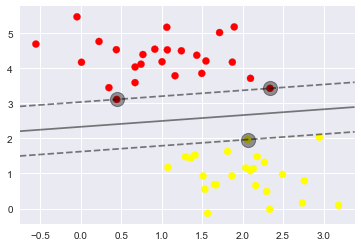

In [3]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """画2维SVC的决策函数（分离超平面）"""
    if ax is None:
        ax = plt.gca() #plt.gca()获得当前的Axes对象ax
    xlim = ax.get_xlim() #Return the x-axis view limits返回x轴视图限制。
    ylim = ax.get_ylim() 
    # 创建评估模型的网格
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x) # 将两个一维数组变为二维矩阵 返回一个行乘和列乘的二维数组
    xy = np.vstack([X.ravel(), Y.ravel()]).T # np.vstack()沿着竖直方向将矩阵堆叠起来。 
    P = model.decision_function(xy).reshape(X.shape)   
    # 画决策边界和边界
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # 画支持向量
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=200, linewidth=1,c='k',alpha=0.4)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

上图中用黑圈表示的点是拟合的关键点，被称为**支持向量**，支持向量坐标存放在`.support_vectors_`属性中

## 4.线性可分支持向量机的对偶形式

然后和感知机一样，线性支持向量机存在对偶形式（引入拉格朗日乘子向量）

原始问题的**对偶问题是极大极小问题**：$$\max_{\alpha}\min_{w,b}L(w,b,\alpha)$$先求极小再求极大，求偏导，利用**随机梯度下降法**优化参数



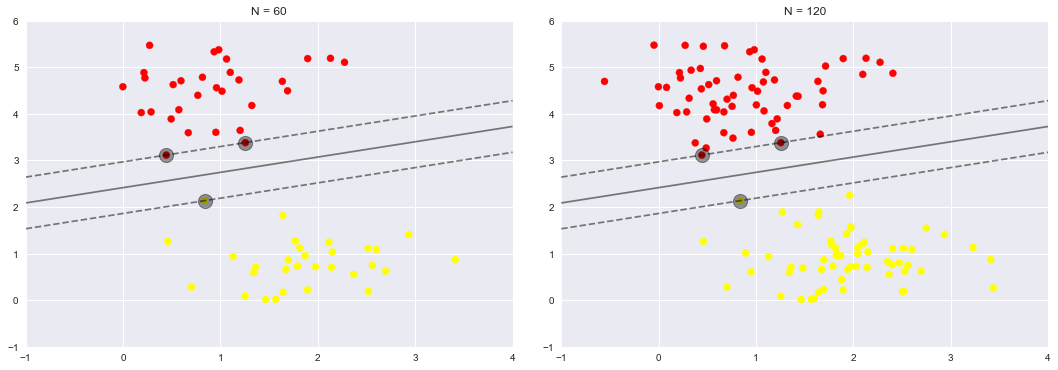

In [4]:
# 画出数据集前60个点和前120个点的拟合结果对比
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

从上方左图可以看到的是前60个训练样本的模型和支持向量。在右图中虽然我们画了前120个训练样本的支持向量。

**但是模型并没有改变，这种对原理边界的数据点不敏感的特点正是SVM模型的优点之一**。

下面使用IPython的**交互组件**观察SVM模型的这个特点

In [5]:
# 导入交互组件模块
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

## 5.线性支持向量机与软间隔最大化

线性不可分意味着某些样本点不能满足函数间隔大于1的约束条件。

为了解决这一问题，引入**松弛变量　$\zeta_i\ge0$　**，使函数间隔加上松弛变量大于等于1。约束条件为：$$y_i(w*x_i+b)-1\ge1-\zeta_i$$
目标函数为：$$\frac{1}{2}||w||^2+C\sum_{i=1}^{N}\zeta_i$$ 其中$C>0$为惩罚参数，C值大时对误分类惩罚增大，反之亦然，为调和系数。

**有了软间隔最大化的定义，就可以处理线性不可分的线性支持向量机，学习问题变成凸二次规划问题**。

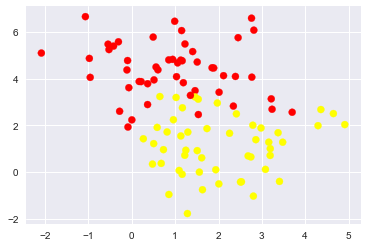

In [6]:
# 使用make_blobs生成有重叠的数据
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

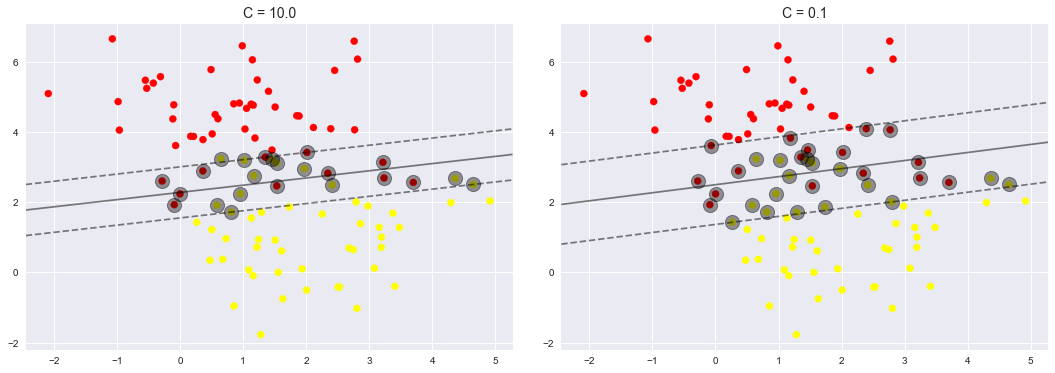

In [7]:
# 定义画板
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
# C为10.0和0.1时软间隔最大化的线性支持向量机
for axi, C in zip(ax, [10.0, 0.1]): # zip()方法:打包为元组的列表
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vetors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

如上程序块所示，**SVC()模型中的C就是惩罚参数，来软化边界**。

边界线的硬度通过C来控制，C很大时，边界很硬；C比较小时，边界较软，有一些数据点就可以穿越边界线。

接下来，我们使用**网格搜索法**来寻找最优C的数值，并作图。

In [21]:
from sklearn.grid_search import GridSearchCV # 网格搜索法
param_grid = {'C':[1,2,3,4,5,6,7,8,9,10]}
grid = GridSearchCV(model, param_grid, cv=7)
grid.fit(X, y)
print(grid.best_params_)

{'C': 2}


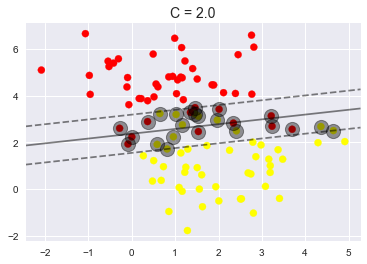

In [31]:
model = SVC(kernel='linear', C=2).fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')
plt.title('C = {0:.1f}'.format(2), size=14)
plt.show()

## 6.非线性支持向量机与核函数

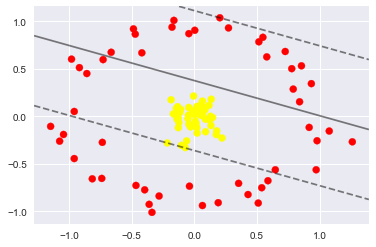

In [43]:
# 为了应用核函数，引入一些非线性可分的数据
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

如上图，2维数据就不能被线性分割，如果能用**多维的一个超平面**将正负例正确分开，则称这个问题为**非线性可分问题**。

非线性问题不好求解，所采取的方法是进行一个非线性变换，将非线性问题变换为线性问题。

**核技巧**的基本想法为：通过一个非线性变换将输入空间对应于一个特征空间，使得在输入空间中的超曲面模型对应于**特征空间中的超平面模型（支持向量机）**

**简明的说就是将对偶问题的目标函数中的内积，转化为非线性的核函数（内积）**。具体公式见统计学习方法。

**核函数**为：$K(x,z)=\phi(x)*\phi(z)$,　　$\phi(z)$为映射函数 

**核技巧的想法**是：在学习与预测中只定义核函数$K(x,z)$，而不显示地定义映射函数。 

### 此时，**带核函数的非线性SVM的目标函数**为：$$W(\alpha)=\frac{1}{2}\sum_{i=1}^{N}\sum_{j=1}^{N}\alpha_i\alpha_jy_iy_jK(x_i,x_j) -\sum_{i=1}^{N}\alpha_i$$**分类决策函数式**为：$$f(x)=sign\lgroup\sum_{i=1}^{N_s}\alpha_{i}^{*}y_iK(x_i,x)+b^*\rgroup$$

核函数的充要条件为**正定核**，就是K关于X的Gram矩阵是半正定的。

常用核函数：**多项式核函数、高斯核函数、字符串核函数**

In [56]:
r = np.exp(-(X ** 2).sum(1))
from mpl_toolkits import mplot3d
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

使用**基函数做核函数**：计算基函数在数据集上**每个**点的变换结果，让SVM算法从所有结果中筛选出最优解。

将线性核转变为RBF（径向基函数）核，设置kernel模型超参数即可。

In [57]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

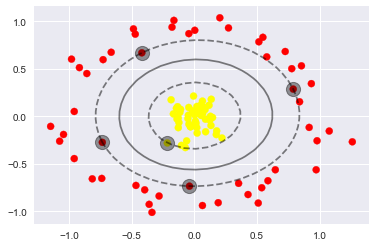

In [58]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

## 7.案例：人脸识别（SVC，分类问题）

使用Wild数据集，首先导入数据集，查看需要处理的数据

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


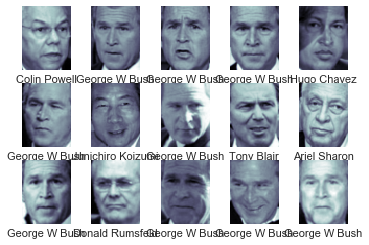

In [32]:
# 导入数据集
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

# 使用ax来定位3行5列画布
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

每个图像包含(62×47)或近3000像素。有1348张人脸图

3千个特征过多，一般使用预处理器来提取更有意义的特征（采用PCA主成成分分析法）提取150个基本元素

然后将它提供给SVC。下面是将预处理器和分类器打包成管道的代码：

In [34]:
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42) # n_components=150
svc = SVC(kernel='rbf', class_weight='balanced') # kernel='rbf'
model = make_pipeline(pca, svc) # 打包管道

C:\Users\lwhpc\Anaconda3\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)



为了测试分类器的训练效果，将数据集分解成训练集和测试集进行交叉检验。

In [35]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

然后用网格搜索交叉检验来寻找最优参数组合。通过不断调整参数C，和参数`gamma`（控制径向基函数核的大小），确定最优模型

In [37]:
from sklearn.grid_search import GridSearchCV
import warnings 
warnings.filterwarnings('ignore')

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 11.7 s
{'svc__C': 5, 'svc__gamma': 0.001}


最优参数落在了网格的中间位置。**如果落在边缘位置，我们还需继续拓展网格搜索范围**。

接下来，我们可以对测试集的数据进行预测了：

In [38]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

from sklearn.metrics import accuracy_score #准确率得分
print('人脸识别分类准确率：',accuracy_score(ytest, yfit))

人脸识别分类准确率： 0.848664688427


**可以看出SVC经过PCA从3000+维度降到150维，分割数据集，然后使用网格搜索和交叉验证寻找网络最优参数的方法**

使得人脸识别率达到了84%。

下面将一些测试图片和预测图片进行对比：

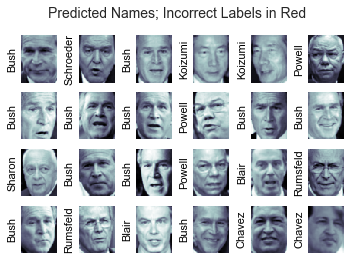

In [39]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

下面我们打印**分类效果报告**，列举每个标签的统计结果，从而对评估器的性能有更全面的了解：

In [40]:
from sklearn.metrics import classification_report # 分类效果报告模块
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.82      0.88      0.85        68
  Donald Rumsfeld       0.72      0.84      0.78        31
    George W Bush       0.98      0.80      0.88       126
Gerhard Schroeder       0.79      0.83      0.81        23
      Hugo Chavez       0.88      0.75      0.81        20
Junichiro Koizumi       0.80      1.00      0.89        12
       Tony Blair       0.82      0.95      0.88        42

      avg / total       0.86      0.85      0.85       337



画出人脸数据混淆矩阵

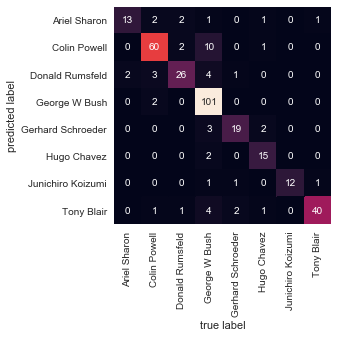

In [42]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

混淆矩阵可以清晰的判断哪些标签容易被分类器误判

真实环境中的人脸识别问题的照片通常不会被切割得这么整齐，两类人脸分类机制的唯一差别在于：

你需要使用**更复杂的算法找到人脸（定位问题）**，然后**提取图片中与像素化无关的人脸特征（OpenCV可以解决）**。